In [40]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [41]:
# Loading the dataset 
df = pd.read_csv(r"D:\VIKAS\Heart-Disease-Predection\notebooks\Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


##### CHANGE SOME OF THE FEATURE NAME 

In [42]:

df.rename(columns={'BP':'Blood Pressure','FBS over 120':'Sugre Blood Value', 'Max HR':'Max heart rate','ST depression':'Segment Depression'},inplace=True)

In [43]:
df.head()

,Age,Sex,Chest pain type,Blood Pressure,Cholesterol,Sugre Blood Value,EKG results,Max heart rate,Exercise angina,Segment Depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   Blood Pressure           270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   Sugre Blood Value        270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max heart rate           270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   Segment Depression       270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [45]:
df.describe()

,Age,Sex,Chest pain type,Blood Pressure,Cholesterol,Sugre Blood Value,EKG results,Max heart rate,Exercise angina,Segment Depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [46]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'Blood Pressure', 'Cholesterol',
       'Sugre Blood Value', 'EKG results', 'Max heart rate', 'Exercise angina',
       'Segment Depression', 'Slope of ST', 'Number of vessels fluro',
       'Thallium', 'Heart Disease'],
      dtype='object')

In [47]:
df.shape

(270, 14)

In [48]:
# Check the missing value in the column
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
Blood Pressure             0
Cholesterol                0
Sugre Blood Value          0
EKG results                0
Max heart rate             0
Exercise angina            0
Segment Depression         0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

- Ratio between the people who have disease or not 

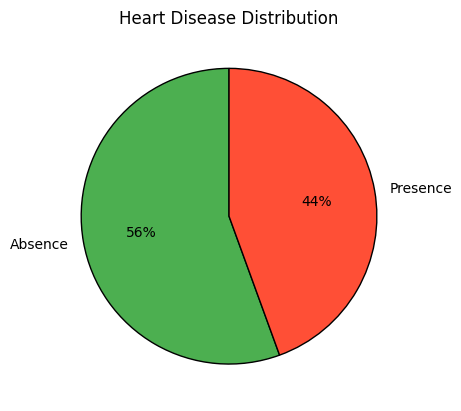

In [49]:
heart_disease = df['Heart Disease'].value_counts()

# Define custom colors
colors = ['#4caf50', '#ff4f36']  # Green for No, Red for Yes (for example)

plt.pie(
    heart_disease.values,
    labels=heart_disease.index,
    autopct='%.0f%%',
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Heart Disease Distribution')
plt.show()


- Ratio between Males and Females

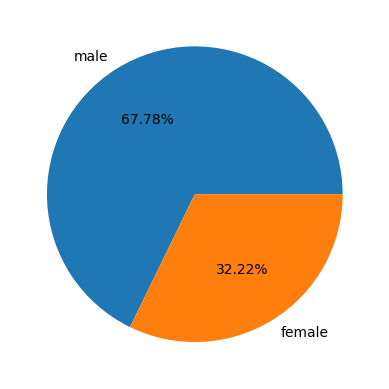

In [50]:
male_female_ratio = df['Sex'].value_counts()
plt.pie(male_female_ratio,labels = ['male','female'],autopct='%.2f%%')
plt.show()

##### Checking the number of Vessels fluro
- "vessels fluro" is referring to coronary vessels (blood vessels in the heart) 
- 0: No vessels are blocked or affected (normal).
- 1: One major vessel is affected (mild CAD).
- 2, 3, 4: More vessels are affected (increasing severity).

<BarContainer object of 4 artists>

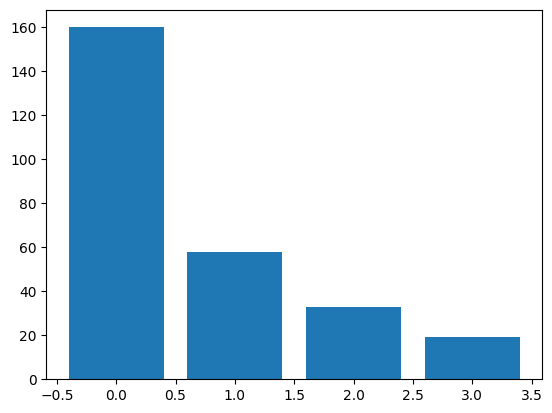

In [51]:
number_vessels_fluro = df['Number of vessels fluro'].value_counts()
plt.bar(x=number_vessels_fluro.index,height=number_vessels_fluro.values)

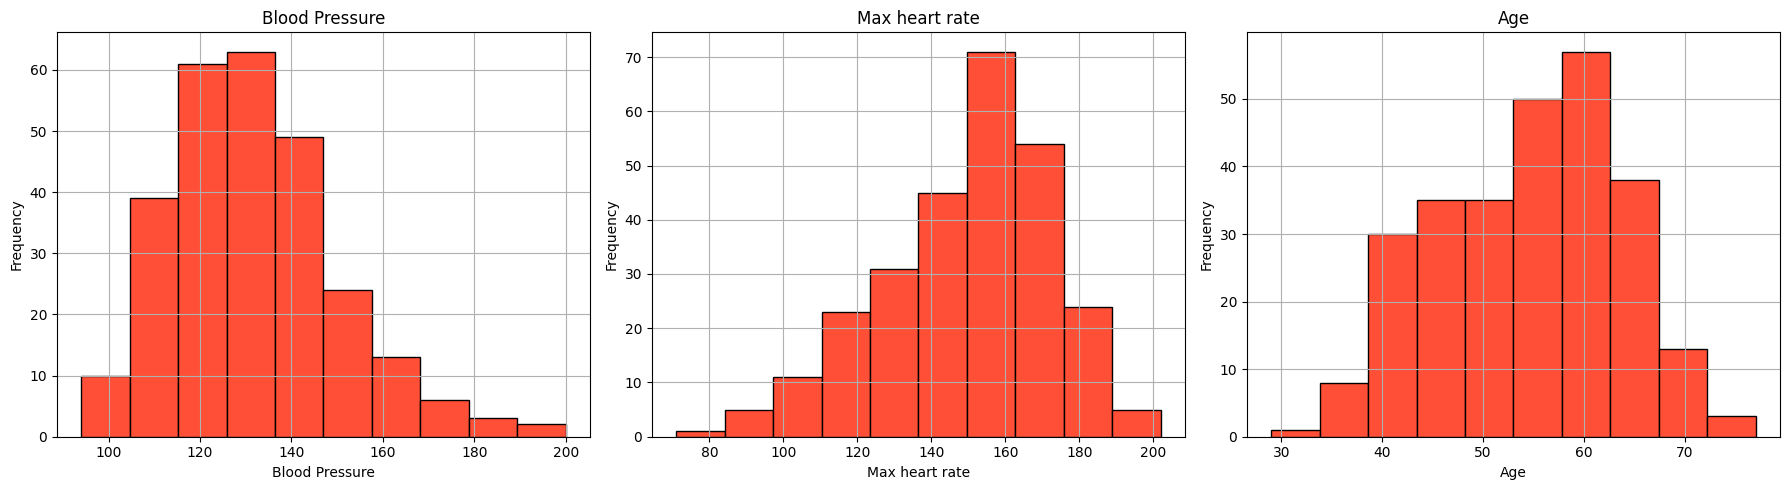

In [52]:
import matplotlib.pyplot as plt

def draw_histogram_continuous_data(df, columns):
    num_plots = len(columns)
    plt.figure(figsize=(6 * num_plots, 5))  

    for i, col in enumerate(columns, 1):
        plt.subplot(1, num_plots, i)
        plt.hist(df[col], edgecolor='black', color='#ff4f36')
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)

    plt.tight_layout()
    plt.show()


draw_histogram_continuous_data(df, ['Blood Pressure', 'Max heart rate', 'Age'])


##### chest pain types are:

- Typical Angina(1)  
- Atypical Angina(2)  
- Non-anginal Pain(3)  
- Asymptomatic (No Chest Pain)(4)

--> The first type, Typical Angina, is the most serious form of chest pain, but its occurrence in the dataset is relatively rare.

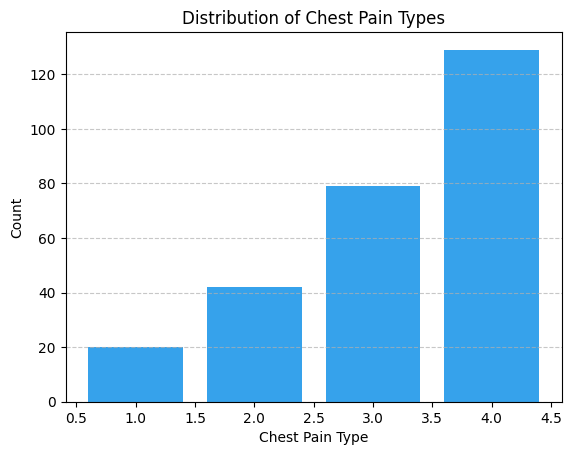

In [53]:
chest_pain_type = df['Chest pain type'].value_counts()
plt.bar(x=chest_pain_type.index, height=chest_pain_type.values, color='#36a2eb')  # Blue shade
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Types')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Correlation between the variable 

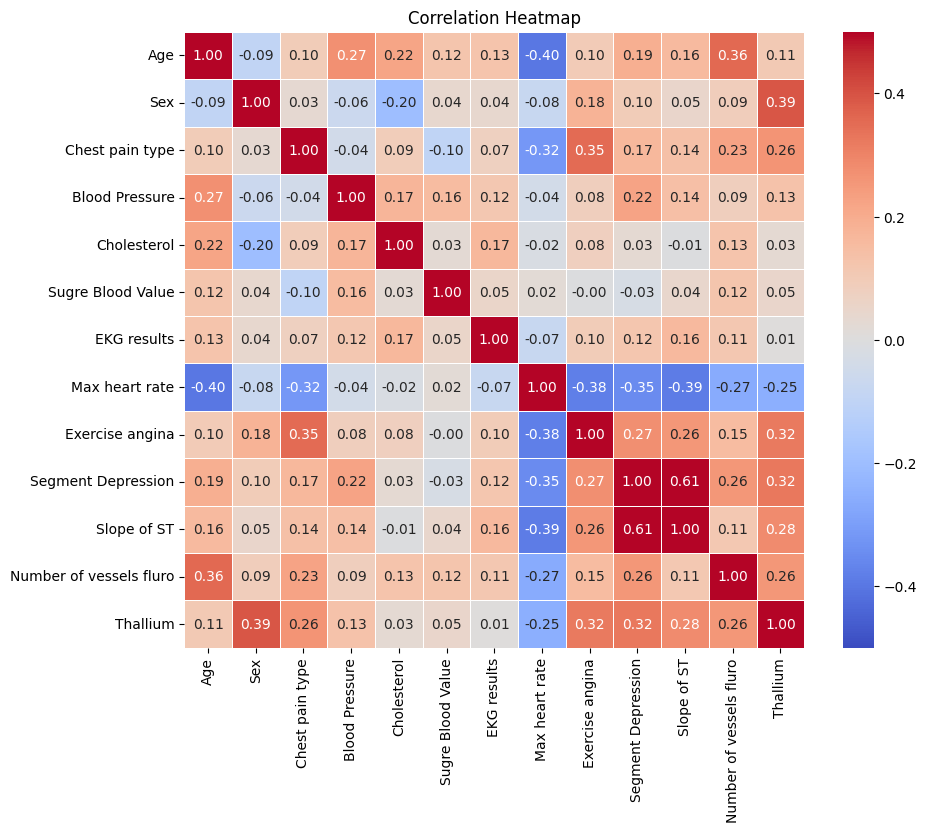

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation only for numeric columns
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    vmax=0.5,
    vmin=-0.5
)
plt.title('Correlation Heatmap')
plt.show()


##### Encoding 'Heart Disease' Column: Presence → 1, Absence → 0

In [55]:
df['Heart Disease'] = df['Heart Disease'].replace({'Presence': 1, 'Absence': 0})


In [56]:
df.head()

,Age,Sex,Chest pain type,Blood Pressure,Cholesterol,Sugre Blood Value,EKG results,Max heart rate,Exercise angina,Segment Depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


#####  Extracting dependent and independent varaible 

In [57]:
X = df.drop(['Heart Disease'],axis=1)
y = df['Heart Disease']

##### Splitting the value of x and y using train_test_split

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [66]:
print("The shape of x_train is ",X_train.shape)
print("The shape of y_train is ",y_train.shape)
print("The shape of x_test is ",X_test.shape)
print("The shape of y_test is ",y_test.shape)

The shape of x_train is  (243, 13)
The shape of y_train is  (243,)
The shape of x_test is  (27, 13)
The shape of y_test is  (27,)


In [63]:
import dagshub
import mlflow

mlflow.set_tracking_uri('https://dagshub.com/ayazr425/Heart-Disease-Pred-proj.mlflow')
dagshub.init(repo_owner='ayazr425', repo_name='Heart-Disease-Pred-proj', mlflow=True)

Accessing as ayazr425

Initialized MLflow to track repo "ayazr425/Heart-Disease-Pred-proj"

Repository ayazr425/Heart-Disease-Pred-proj initialized!

In [65]:
import mlflow
import logging
import time
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Set MLflow experiment
mlflow.set_experiment("USING DIFF ALGORITHM")

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=10)
}

# Define training function
def training_model(model, X_train_scaled, X_test_scaled, y_train, y_test):
    start_time = time.time()
    
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    logging.info(f"Training {model.__class__.__name__} complete. Accuracy: {acc:.4f}")
    
    end_time = time.time()
    logging.info(f"Training time: {end_time - start_time:.2f} seconds.")
    
    return model, acc, cm, precision, recall, f1

# Scale features before looping
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Start MLflow parent run
with mlflow.start_run(run_name="Parent_Run"):
    for name, classifier in classifiers.items():
        with mlflow.start_run(nested=True, run_name=f"{name}_Run"):  # Nested run for each model
            logging.info(f"Training {name}...")

            best_model, acc, cm, precision, recall, f1 = training_model(
                classifier, X_train_scaled, X_test_scaled, y_train, y_test
            )

            mlflow.log_param("Model", name)
            mlflow.log_params(best_model.get_params()) #mlflow.log_params(best_model.get_params()) logs them to MLflow without needing to specify each one manually.
            mlflow.log_metric("Accuracy", acc)
            mlflow.log_metric("Precision", precision)
            mlflow.log_metric("Recall", recall)
            mlflow.log_metric("F1 Score", f1)

            mlflow.sklearn.log_model(best_model, f"model_{name.replace(' ', '_')}")

            logging.info(f"Completed logging for {name}.")


2025-04-14 13:49:17,944 - INFO - Training Logistic Regression...
2025-04-14 13:49:18,073 - INFO - Training LogisticRegression complete. Accuracy: 0.8148
2025-04-14 13:49:18,075 - INFO - Training time: 0.13 seconds.
2025/04/14 13:49:35 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2025-04-14 13:49:35,295 - INFO - Completed logging for Logistic Regression.
2025/04/14 13:49:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression_Run at: https://dagshub.com/ayazr425/Heart-Disease-Pred-proj.mlflow/#/experiments/0/runs/55bc9e5268894168acaa867127bcc2dd.
2025/04/14 13:49:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/ayazr425/Heart-Disease-Pred-proj.mlflow/#/experiments/0.
2025-04-14 13:49:36,649 - INFO - Training Decision Tree...
2025-04-14 13:49:36,690 - INFO - Training DecisionTreeClassifier complete. Accuracy: 0.8148
2